In [21]:
## IMPORTING NECESSARY LIBRARIES
from google.colab import files
import zipfile
import os
import io
from io import BytesIO
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from keras.optimizers import Adamax, Adam, Nadam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau








In [22]:
## UPLOADING THE FLOWER ZIP FILE
uploaded = files.upload()

Saving FLOWERS_DATA.zip to FLOWERS_DATA (1).zip


In [26]:
## EXTRACTING THE CONTENTS FROM THE FLOWER ZIP FILE
data= zipfile.ZipFile(io.BytesIO(uploaded['FLOWERS_DATA (1).zip']))
data.extractall()
data.printdir()
data.close()

File Name                                             Modified             Size
FLOWERS_DATA/                                  2024-11-04 10:02:26            0
FLOWERS_DATA/TEST_FLOWER/                      2024-11-04 10:02:04            0
FLOWERS_DATA/TEST_FLOWER/TEST_DAISY/           2024-11-04 09:59:28            0
FLOWERS_DATA/TEST_FLOWER/TEST_DAISY/1396526833_fb867165be_n.jpg 2024-11-04 09:59:28        37409
FLOWERS_DATA/TEST_FLOWER/TEST_DAISY/1441939151_b271408c8d_n.jpg 2024-11-04 09:59:28        19064
FLOWERS_DATA/TEST_FLOWER/TEST_DAISY/1656856503_447e5b0f03.jpg 2024-11-04 09:59:28       113826
FLOWERS_DATA/TEST_FLOWER/TEST_DAISY/1879567877_8ed2a5faa7_n.jpg 2024-11-04 09:59:28        27478
FLOWERS_DATA/TEST_FLOWER/TEST_DAISY/1955336401_fbb206d6ef_n.jpg 2024-11-04 09:59:28        31605
FLOWERS_DATA/TEST_FLOWER/TEST_DAISY/2001380507_19488ff96a_n.jpg 2024-11-04 09:59:28        38478
FLOWERS_DATA/TEST_FLOWER/TEST_DAISY/2019064575_7656b9340f_m.jpg 2024-11-04 09:59:28        12322
FLO

In [27]:
## PATH CREATION
base_dir = 'FLOWERS_DATA'

train_dir = os.path.join(base_dir, 'TRAIN_FLOWER')
test_dir = os.path.join(base_dir, 'TEST_FLOWER')

train_rose_dir = os.path.join(train_dir, 'TRAIN_ROSES')
train_dand_dir = os.path.join(train_dir, 'TRAIN_DAND')
train_sunf_dir = os.path.join(train_dir, 'TRAIN_SUNF')
train_tulips_dir = os.path.join(train_dir, 'TRAIN_TULIPS')
train_daisy_dir = os.path.join(train_dir, 'TRAIN_DAISY')

test_rose_dir = os.path.join(test_dir, 'TEST_ROSES')
test_dand_dir = os.path.join(test_dir, 'TEST_DAND')
test_sunf_dir = os.path.join(test_dir, 'TEST_SUNF')
test_tulips_dir = os.path.join(test_dir, 'TEST_TULIPS')
test_daisy_dir = os.path.join(test_dir, 'TEST_DAISY')

tr_rose_fnames = os.listdir(train_rose_dir)
tr_dand_fnames = os.listdir(train_dand_dir)
tr_sunf_fnames = os.listdir(train_sunf_dir)
tr_tulips_fnames = os.listdir(train_tulips_dir)
tr_daisy_fnames = os.listdir(train_daisy_dir)

print(tr_rose_fnames)
print(tr_dand_fnames)
print(tr_sunf_fnames)
print(tr_tulips_fnames)
print(tr_daisy_fnames)



['145862135_ab710de93c_n.jpg', '123128873_546b8b7355_n.jpg', '24781114_bc83aa811e_n.jpg', '99383371_37a5ac12a3_n.jpg', '102501987_3cdb8e5394_n.jpg', '22679076_bdb4c24401_m.jpg', '12240303_80d87f77a3_n.jpg', '118974357_0faa23cce9_n.jpg', '110472418_87b6a3aa98_m.jpg', '159079265_d77a9ac920_n.jpg']
['10443973_aeb97513fc_m.jpg', '7355522_b66e5d3078_m.jpg', '8475758_4c861ab268_m.jpg', '9818247_e2eac18894.jpg', '8223949_2928d3f6f6_n.jpg', '8684108_a85764b22d_n.jpg', '8223968_6b51555d2f_n.jpg', '8181477_8cb77d2e0f_n.jpg', '8475769_3dea463364_m.jpg', '10683189_bd6e371b97.jpg']
['40410686_272bc66faf_m.jpg', '6953297_8576bf4ea3.jpg', '27465811_9477c9d044.jpg', '39271782_b4335d09ae_n.jpg', '26254755_1bfc494ef1_n.jpg', '35477171_13cb52115c_n.jpg', '24459548_27a783feda.jpg', '29972905_4cc537ff4b_n.jpg', '27466794_57e4fe5656.jpg', '24459750_eb49f6e4cb_m.jpg']
['10791227_7168491604.jpg', '11746276_de3dec8201.jpg', '38287568_627de6ca20.jpg', '54895006_55b49052dc.jpg', '14957470_6a8c272a87_m.jpg', '117

In [28]:
## PRINTING THE NUMBER OF TRAINING IMAGES FOR EACH OF THE 5 CLASSES OF FLOWERS
print("Number of Rose Files are", len(tr_rose_fnames))
print("Number of Dandelion Files are", len(tr_dand_fnames))
print("Number of Sunflower Files are", len(tr_sunf_fnames))
print("Number of Tulip Files are", len(tr_tulips_fnames))
print("Number of Daisy Files are", len(tr_daisy_fnames))


Number of Rose Files are 10
Number of Dandelion Files are 10
Number of Sunflower Files are 10
Number of Tulip Files are 10
Number of Daisy Files are 10


In [29]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [30]:
## RESCALING OF IMAGES USING IMAGE DATA GENERATOR FROM KERAS

test_datagen = ImageDataGenerator(rescale = 1/255)


In [31]:
## GENERATING THE TRAINING AND TESTING DATA
train_data = train_datagen.flow_from_directory(train_dir, target_size = (150,150), class_mode = 'categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size = (150,150), class_mode = 'categorical')

Found 50 images belonging to 5 classes.
Found 35 images belonging to 5 classes.


In [32]:
## STORING THE IMAGES AND THEIR RESPECTIVE TARGET VALUES
X, y = next(train_data)

print(X.shape)
print(y.shape)

(32, 150, 150, 3)
(32, 5)


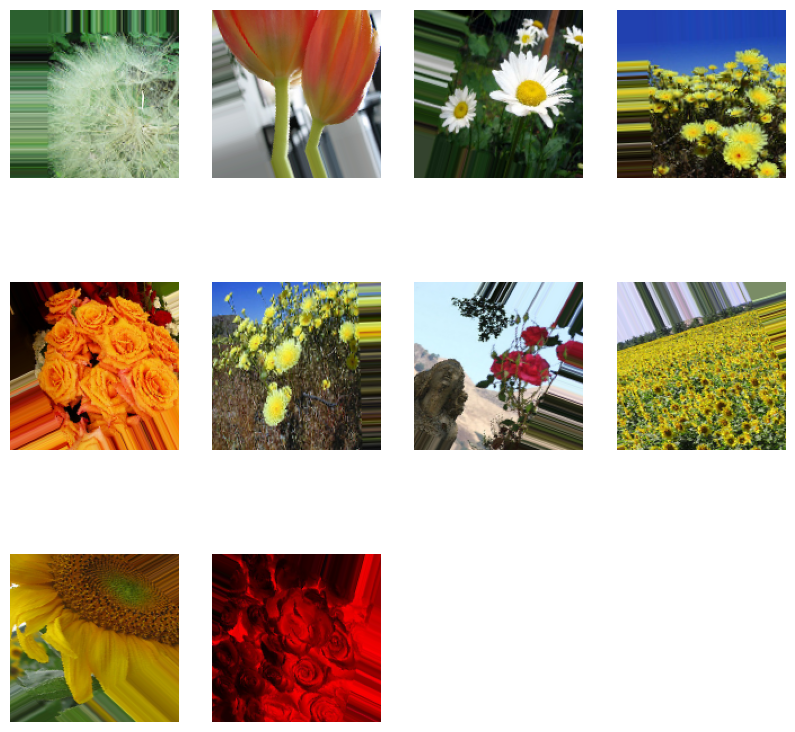

In [33]:
## DEFINING THE CLASSES OR LABELS FOR EACH OF THE 5 CLASSES OF FLOWERS
class_names = ['0', '1', '2','3', '4', '5']

## VISUALIZING THE FIRST 10 IMAGES
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X[i])
    plt.axis('off')


In [34]:
## MODEL BUILDING FOR CNN
model = Sequential()

In [35]:
## ARCHITECTURE OF THE CNN
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 150, 150, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 75, 75, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,618,629 (9.99 MB)

 Trainable params: 2,617,477 (9.98 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [36]:
## MODEL COMPILATION
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
## CREATION OF THE CALLBACKS FOR ROBUST MODEL

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    min_lr=1e-6
)


In [41]:
## TRAINING THE NETWORK
history = model.fit(train_data, validation_data = test_data, epochs = 50, callbacks= [early_stopping, reduce_lr])

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.5817 - loss: 4.2806 - val_accuracy: 0.2000 - val_loss: 1.5829 - learning_rate: 2.0000e-04
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.4896 - loss: 4.1799 - val_accuracy: 0.2000 - val_loss: 1.5831 - learning_rate: 2.0000e-04
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step - accuracy: 0.4548 - loss: 2.2284 - val_accuracy: 0.2286 - val_loss: 1.6103 - learning_rate: 2.0000e-04
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.5817 - loss: 2.8029 - val_accuracy: 0.2857 - val_loss: 1.6790 - learning_rate: 2.0000e-04
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.5742 - loss: 2.4678 - val_accuracy: 0.2571 - val_loss: 1.7571 - learning_rate: 2.0000e-04
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 9s/step - accuracy: 0.5533 - loss: 2.0947 - val_accuracy: 0.2857 - val_loss: 1.8348 - learning_rate: 2.0000e-04
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - accuracy: 0.6054 - loss: 2.0179 - val_

In [42]:
## INLINE PREDICTION FROM THE MODEL
y_pred = model.predict(train_data)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 692ms/step


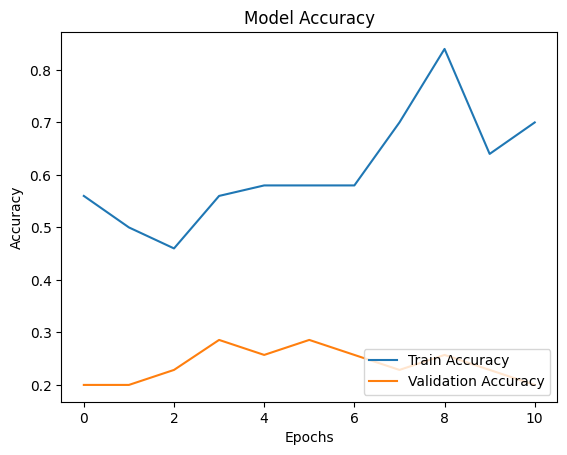

In [43]:
## VISUALISING THE MODEL HISTORY
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()